<a href="https://colab.research.google.com/github/imsewonyyy/AI-/blob/main/%EA%B9%80%EC%A0%95%EC%9D%80%20%EB%AC%B8%EC%A0%9C%ED%92%80%EC%9D%B4_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 연습문제/과제풀이

# A: 6장 신규노선 항공운임예측 풀기


#### Colab 한글 폰트 설정하기
Colab에서 한글 폰트를 사용하려면 폰트를 설치하고 런타임을 재시작한 후, Matplotlib 설정을 변경해야 합니다.

**1) 폰트 설치 (코드 셀에서 실행)**

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

**2) 런타임 재시작**
* Colab 메뉴에서 **[런타임] > [세션 다시 시작]**을 클릭합니다. (Ctrl+M .)

**3) Matplotlib 폰트 설정 (세션 재시작 후)**


한글 폰트 'NanumGothic' 설정 완료.


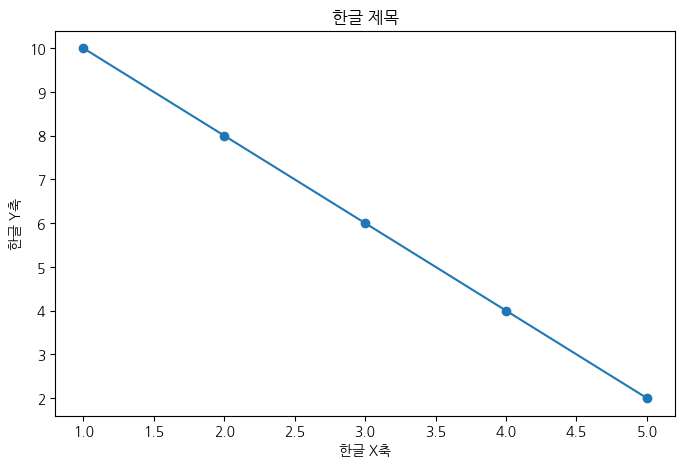

In [ ]:
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as fm

    # 런타임 재시작 후 Nanum 폰트 확인 및 설정
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    font_prop = fm.FontProperties(fname=font_path)

    # 전역 폰트 설정
    plt.rc('font', family='NanumGothic')
    # 마이너스 기호 깨짐 방지
    plt.rcParams['axes.unicode_minus'] = False

    print("한글 폰트 'NanumGothic' 설정 완료.")

    # 이제 그래프에 한글 사용 가능 (test 용)
    fig, ax = plt.subplots(figsize=(8, 5))
    x = [1, 2, 3, 4, 5]
    y = [10, 8, 6, 4, 2]
    ax.plot(x, y, marker='o')
    ax.set_title('한글 제목')
    ax.set_xlabel('한글 X축')
    ax.set_ylabel('한글 Y축')
    plt.show()




---



먼저, 데이터 파일을 불러옴.

In [1]:
from google. colab import files
uploaded=files.upload()

Saving Airfares.csv to Airfares (5).csv


# a. 수치형 예측 변수들과 결과 변수인 운임(FARE)에 대한 표본 만들고 운임과 예측 변수들 사이의 상관도를 조사하시오. 어떤 예측 변수와 운임을 예측하는 데 최적의 예측 변수인가?

1. 수치형 변수 선택

수치형(연속형) 변수만 대상으로 해야 하므로 범주형 변수는 제외하고 다음과 같은 변수들을 선택함:

COUPON, NEW, HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE, PAX

2. 운임(FARE)과의 상관계수 계산

상관계수(Pearson correlation coefficient)를 FARE에 대해 계산하면, 어떤 변수가 운임과 직선적으로 얼마나 강한 관계를 가지는지 알 수 있음.

In [2]:
import pandas as pd

df = pd.read_csv("Airfares.csv")

# 수치형 변수만 필터링
numeric_vars = ['COUPON', 'NEW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE', 'PAX', 'FARE']
corr_matrix = df[numeric_vars].corr()

# 운임(FARE)과 다른 변수들 간의 상관계수 정렬
fare_corr = corr_matrix['FARE'].drop('FARE').sort_values(ascending=False)
print(fare_corr)

DISTANCE    0.670016
COUPON      0.496537
E_INCOME    0.326092
E_POP       0.285043
S_INCOME    0.209135
S_POP       0.145097
NEW         0.091730
HI          0.025195
PAX        -0.090705
Name: FARE, dtype: float64


운임(FARE)을 예측하는 데 있어 가장 효과적인 수치형 변수들을 파악하기 위해, 각 변수와 FARE 간의 Pearson 상관계수를 계산하였다. 상관계수가 클수록 두 변수 간의 선형적 관계가 강하다고 해석할 수 있다.

* DISTANCE(거리) 변수는 운임과 가장 높은 양의 상관계수(0.6700)를 보여주며,
운임 예측에 가장 효과적인 변수로 나타났다. 이는 항공 노선의 거리가 멀수록 평균 항공료가 높아지는 일반적인 경제 원칙과도 부합한다.

* COUPON, E_INCOME도 다소 의미 있는 양의 상관을 보이며, 운임에 일정 수준의 영향을 주는 변수로 판단된다.

* 반면 PAX(탑승객 수)는 음의 상관(-0.0907)을 보이며, 탑승객 수가 많을수록 운임이 낮아지는 경향을 나타낸다.

* HI(시장 집중도)와 NEW(신규 항공사 수) 등은 상관도가 낮아 단일 변수로서의 예측력은 크지 않을 것으로 보인다.

결론:

운임(FARE)을 예측하는 데 **가장 효과적인 수치형 변수는 DISTANCE**이며, 그 다음으로 COUPON과 E_INCOME이 유의미한 예측력을 보였다.

# b. 범주형 예측 변수들(예: SW 등)에 대해 범주별로 평균 운임의 차이와 분산의 패턴을 분석하고, 어떤 범주형 예측 변수가 운임 예측에 가장 좋은지를 평가하라.

범주형 변수는 주로 다음과 같음:

* SW : Southwest 항공 운항 여부 (Yes/No)

* VACATION : 휴양지 여부 (Yes/No)

* SLOT : 공항의 슬롯 (Free/Controlled)

* GATE: 게이트 제한 여부 (Free/Constrained)

* NEW도 범주형으로 처리 가능

이 중에서 **SW, VACATION, SLOT, GATE**를 주요 분석 대상으로 삼음.

그 다음, 각 범주형 변수의 그룹별 평균 운임 확인

In [3]:
# SW 변수에 따른 평균 운임 확인
print(df.groupby('SW')['FARE'].mean())
print(df.groupby('SW')['FARE'].std())

print(df.groupby('VACATION')['FARE'].mean())
print(df.groupby('VACATION')['FARE'].std())

print(df.groupby('SLOT')['FARE'].mean())
print(df.groupby('GATE')['FARE'].mean())

SW
No     188.182793
Yes     98.382268
Name: FARE, dtype: float64
SW
No     70.558360
Yes    44.795629
Name: FARE, dtype: float64
VACATION
No     173.552500
Yes    125.980882
Name: FARE, dtype: float64
VACATION
No     81.086891
Yes    44.102634
Name: FARE, dtype: float64
SLOT
Controlled    186.059396
Free          150.825680
Name: FARE, dtype: float64
GATE
Constrained    193.129032
Free           153.095953
Name: FARE, dtype: float64


따라서 결론은 이러함.

* SW 변수는 Yes일 때 평균 운임이 훨씬 낮아짐 → 항공사 경쟁 효과로 해석 가능. 운임 예측에 매우 유의미.

* **SLOT, GATE**는 제약이 있는 경우 운임이 높음 → 공항 인프라의 제약이 가격에 영향을 미친다는 해석.

* **VACATION**은 유의미한 차이를 보일 수도 있지만 경우에 따라 차이가 작을 수 있음.

결론적으로 운임 예측에 **가장 유효한 범주형 변수는 SW**로 나타났으며, SLOT, GATE도 유의미한 설명력을 가진다.

--------------------------------------------------------------------

1. 연습문제 C번 / 새로운 노선의 평균 운임을 예측하는 모델을 찾으시오.

C - i 번 / 범주형 변수(ex. SW)들을 가변수로 변환하시오. 그런 다음, 데이터를 학습 데이터셋과 검증 데이터셋으로 분할하시오. 학습 데이터셋에 모델을 적합하고 이를 검증 데이터셋으로 평가하시오.

1. 필요 라이브러리 불러오기

In [4]:
import pandas as pd # (맨 처음에 이미 언급되어 중복 시 생략 가능)
from sklearn.model_selection import train_test_split # 데이터를 학습용 / 검증용으로 나누는 함수, 전체 데이터를 70:30 비율로 분할하여 모델 훈련과 성능 평가에 사용
from sklearn.linear_model import LinearRegression # 선형 회귀 모델 객체를 생성
from sklearn.metrics import mean_squared_error, r2_score # 모델의 성능 평가 지표를 계산, {mean_squared_error: 예측값과 실제값 사이의 평균 제곱 오차 (RMSE 등으로 활용), r2_score: 결정계수 (모델 설명력, 1에 가까울수록 좋음)}

2. 데이터 불러오기 & 범주형 변수 가변수화

In [5]:
# 데이터 로딩 (이미 a번 문제에서 df로 불러왔기에 생략 가능)


# 범주형 변수 가변수화 (drop_first로 다중공선성 방지)
categorical_vars = ['S_CODE', 'S_CITY', 'E_CODE', 'E_CITY', 'VACATION', 'SW', 'SLOT', 'GATE'] # 'S_CODE', 'S_CITY', 'E_CODE', 'E_CITY'도 범주형 변수임. 허나, '숫자적 의미가 없고 명목형 데이터'임으로 회귀 모델에서 사용하기 위해서는 가변수 처리되어야 함.
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)
# pd.get_dummies() : 범주형을 숫자형 가변수로 변환
# columns=categorical_vars : 가변수화할 범주형 변수 지정
# drop_first=True	: 첫 범주는 제거하여 중복 방지
# df_encoded : 새 데이터프레임으로 저장
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)



# 결측치 제거
df_encoded.dropna(inplace=True)


3. 변수 분리 및 학습 & 검증데이터셋으로 분할

In [6]:
X = df_encoded.drop(columns=['FARE'])  # 독립변수(전체 데이터프레임 (운임에 영향을 줄 수 있는 변수들))
y = df_encoded['FARE']                 # 종속변수(예측 대상인 FARE (운임))

# 학습 70% / 검증 30% 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train, y_train : 학습용 데이터 70개
# X_valid, y_valid : 검증용 데이터 30개
# train_test_split	: 이 두 데이터를 자동으로 나누어주는 함수
# random_state=42	: 데이터 분할을 매번 같게 유지하기 위한 시드값 (재현 가능성 확보)

4. 회귀 모델 학습 및 평가

In [7]:
# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train) # 학습 데이터로 모델 훈련. 즉, 변수들의 계수(회귀계수)를 학습하여 운임(FARE)를 예측할 수 있도록 함


# 예측
y_pred = model.predict(X_valid) # 훈련된 모델에 검증 데이터(X_valid)를 넣어 운임 예측값 y_pred 생성

# 성능 평가
#rmse = mean_squared_error(y_valid, y_pred, squared=False) # squared = False : 평균 제곱 오차(mse : mean squared error)의 제곱근을 구하는  → RMSE 계산
# 위 코딩에서 오류 발생 시 다음 코딩 사용할 것
mse = mean_squared_error(y_valid, y_pred)
rmse = mse**0.5
r2 = r2_score(y_valid, y_pred) # r2 : 모델이 전체 데이터의 분산(변동)을 얼마나 잘 설명하는지를 수치화

print(f"검증 RMSE: {rmse:.2f}")
print(f"검증 R²: {r2:.4f}")


검증 RMSE: 31.42
검증 R²: 0.8380


5. 평가 결과

검증 RMSE: 31.42
검증 R²: 0.8380

검증 결과로 나온 다음 두 성능 지표는 모델이 얼마나 정확하게 항공 운임을 예측했는지를 나타냄.


RMSE (Root Mean Squared Error): 31.42 라는 지표를 통해 모델이 예측한 항공 운임이 실제 값과 평균적으로 약 31.42달러 차이가 난다는 것을 알 수 있음.


R² (결정계수): 0.8380 라는 지표를 통해 전체 운임 변동성의 약 83.8%를 모델이 설명하고 있다는 것을 알 수 있음. 매우 우수한 성능을 가진 모델임



---

**김정은_문제풀이**

**추가적인 모델 성능 검증**

In [8]:
y_pred

array([130.33134527,  95.6415181 , 131.52513736, 121.02301717,
       291.26933094, 108.56401284, 154.53163176, 183.84857439,
       285.1971572 , 307.40612531, 309.41649256, 262.53139199,
       215.89106481, 238.93596158, 164.55093183, 280.39434952,
       128.21364199, 197.22714649, 281.05386732,  54.8334003 ,
       152.06134106, 164.1713304 , 274.62406445, 168.32345918,
       113.93650031, 214.62376976, 177.60822382, 155.75056065,
       123.70942793, 216.303847  , 155.49556996, 262.11616539,
       217.89260801, 102.30416275, 290.08412317, 156.81042732,
        15.42159244, 285.54284548, 180.07755805, 155.98337872,
       108.40608666, 134.36945136,  76.10652094, 167.46461099,
        11.30502549, 162.1406246 ,  29.08802804, 181.34905095,
       252.44236317,  20.27072313, -51.49702736, 240.2200265 ,
       155.79735097, 190.30558306,  89.66317989,  59.4628058 ,
       168.77418137, 222.46911242, 110.29291907, 137.45124387,
       136.98832329,  -4.88412583, 157.1561156 , 187.56

**=> 예측 운임료가 음수인 경우 존재 -> 이상값**

**1. 실제 운임료(y_valid)과 비교해 모델 성능 평가**
- 이상치 분석, 오차가 큰 노선 경향 찾기

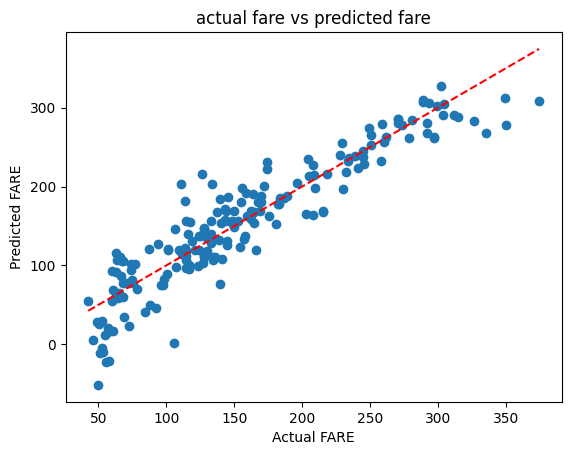

In [9]:

# 산점도를 통한 시각적 분석
import matplotlib.pyplot as plt

plt.scatter(y_valid, y_pred)
plt.xlabel("Actual FARE")
plt.ylabel("Predicted FARE")
plt.title("actual fare vs predicted fare")
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--')  # 완벽 예측선
plt.show()


* 예측 운임료가 음수인 경우가 있음 => 이상치나, 모델 문제가 있을 수 있음

**오차계산을 통해 이상치 찾기**

In [10]:
# 예측값과 실제값 차이 (잔차) 계산
errors = y_valid.values - y_pred  # 잔차 = 실제값 - 예측값

# DataFrame으로 정리
results_df = pd.DataFrame({
    '실제 운임': y_valid.values,
    '예측 운임': y_pred,
    '오차 (실제 - 예측)': errors})


In [11]:
# 예측이 실제보다 훨씬 높은 (예측 과대) 상위 5개
over_predictions = results_df.sort_values(by='오차 (실제 - 예측)').head(5)
print("📈 운임 과대예측 TOP 5")
print(over_predictions)


📈 운임 과대예측 TOP 5
      실제 운임       예측 운임  오차 (실제 - 예측)
114  110.42  203.769218    -93.349218
29   125.90  216.303847    -90.403847
182  133.50  203.801704    -70.301704
47   113.99  181.349051    -67.359051
82   174.06  230.776307    -56.716307


In [12]:
# 예측이 실제보다 훨씬 낮은 (예측 과소) 상위 5개
under_predictions = results_df.sort_values(by='오차 (실제 - 예측)', ascending=False).head(5)
print("📉 운임 과소예측 TOP 5")
print(under_predictions)

📉 운임 과소예측 TOP 5
      실제 운임       예측 운임  오차 (실제 - 예측)
190  105.45    2.179269    103.270731
50    49.77  -51.497027    101.267027
72    57.62  -21.307806     78.927806
96    55.57  -22.064142     77.634142
102  349.97  278.463189     71.506811


In [13]:
results_df['절댓값 오차'] = results_df['오차 (실제 - 예측)'].abs()
largest_errors = results_df.sort_values(by='절댓값 오차', ascending=False).head(5)
print("❗ 오차가 가장 큰 TOP 5 노선")
print(largest_errors)


❗ 오차가 가장 큰 TOP 5 노선
      실제 운임       예측 운임  오차 (실제 - 예측)      절댓값 오차
190  105.45    2.179269    103.270731  103.270731
50    49.77  -51.497027    101.267027  101.267027
114  110.42  203.769218    -93.349218   93.349218
29   125.90  216.303847    -90.403847   90.403847
72    57.62  -21.307806     78.927806   78.927806


In [14]:
# 오차가 큰 노선들의 전체 특성을 X_valid에서 함께 출력
import numpy as np

# 예측값 vs 실제값 vs 오차
errors = y_valid.values - y_pred

results_df = pd.DataFrame({
    '실제 운임': y_valid.values,
    '예측 운임': y_pred,
    '오차': errors,
    '절댓값 오차': np.abs(errors)
}, index=y_valid.index)  # 인덱스를 원래 인덱스로 유지!

In [15]:
# 오차가 가장 큰 TOP 5 노선 선택
top_error_indices = results_df.sort_values(by='절댓값 오차', ascending=False).head(5).index

In [16]:
# X_valid에서 해당 노선들의 입력 특성 뽑기
top_error_features = X_valid.loc[top_error_indices]

In [17]:
# 전체 정보 합치기
full_top_error_info = pd.concat([top_error_features, results_df.loc[top_error_indices]], axis=1)
print("❗ 오차가 가장 큰 노선 5개의 특성과 예측/실제 운임 비교:")
print(full_top_error_info)


❗ 오차가 가장 큰 노선 5개의 특성과 예측/실제 운임 비교:
     COUPON  NEW       HI  S_INCOME  E_INCOME    S_POP    E_POP  DISTANCE  \
549    1.04    3  3375.37   21207.0   21002.0  2105604   258019       399   
568    1.10    3  3552.11   24575.0   20375.0  1197234   766956       357   
81     1.06    3  8162.77   30124.0   26506.0  5787293  4459144       616   
409    1.41    3  4014.79   29260.0   29284.0  7830332   298680      1680   
56     1.16    3  3465.14   24575.0   22263.0  1197234   472254       602   

       PAX  S_CODE_DCA  ...  E_CITY_Washington          DC  \
549   2789           0  ...                              0   
568   5658           0  ...                              0   
81   10358           0  ...                              0   
409   3926           0  ...                              0   
56    8810           0  ...                              0   

     E_CITY_West Palm Beach     FL  VACATION_Yes  SW_Yes  SLOT_Free  \
549                              0             1       0  

* 앞서 구한 '오차가 가장 큰 TOP 5 노선'과 바로 위 코드에서 구한
'오차가 가장 큰 노선 5개의 특성과 예측/실제 운임 비교' 에서 구한 노선의 인덱스가 다른 것은 y.predict가 인덱스 없이 순서만 있어 섞였기 때문. 인덱스만 다르게 나왔을 뿐, 동일한 노선임.

**오차가 큰 노선 특징 분석 - 수치형 변수(DISTANCE, PAX)**
: 오차가 큰 노선의 distance와 pax가 전체 검증데이터셋과 비교하여 어떠한 경향을 띠고 있는지 알기 위한 분석.


📊 전체 검증셋 통계 (DISTANCE & PAX)
          DISTANCE           PAX
count   192.000000    192.000000
mean    888.385417  13715.604167
std     648.929886  14121.214177
min     167.000000   2789.000000
25%     381.250000   5779.750000
50%     700.500000   8647.500000
75%    1101.250000  15510.750000
max    2579.000000  73892.000000


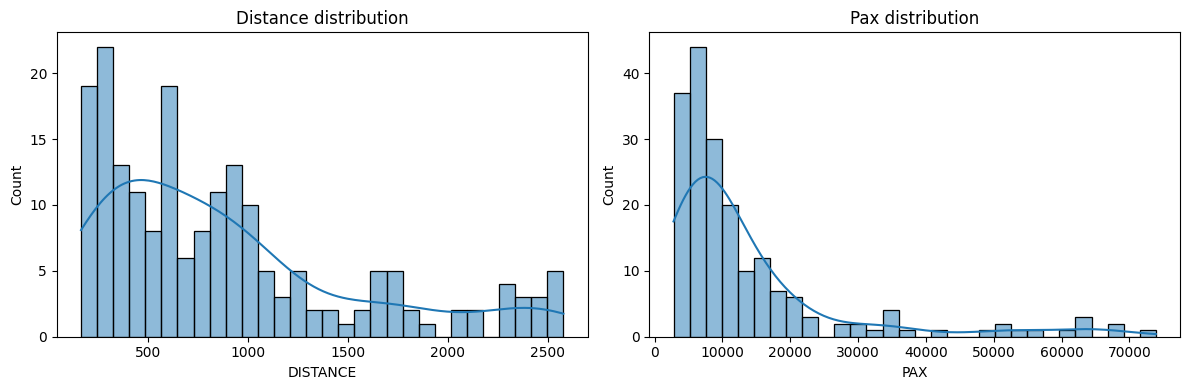

In [18]:

# 전체 검증셋 기준
print("📊 전체 검증셋 통계 (DISTANCE & PAX)")
print(X_valid[['DISTANCE', 'PAX']].describe())

# 분포 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 전체 Distance 분포
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(X_valid['DISTANCE'], bins=30, kde=True)
plt.title('Distance distribution')

# 전체 Pax 분포
plt.subplot(1, 2, 2)
sns.histplot(X_valid['PAX'], bins=30, kde=True)
plt.title('Pax distribution')

plt.tight_layout()
plt.show()


📌 오차 큰 TOP 5 노선 통계 (DISTANCE & PAX)
          DISTANCE           PAX
count     5.000000      5.000000
mean    730.800000   6308.200000
std     543.269454   3207.112751
min     357.000000   2789.000000
25%     399.000000   3926.000000
50%     602.000000   5658.000000
75%     616.000000   8810.000000
max    1680.000000  10358.000000


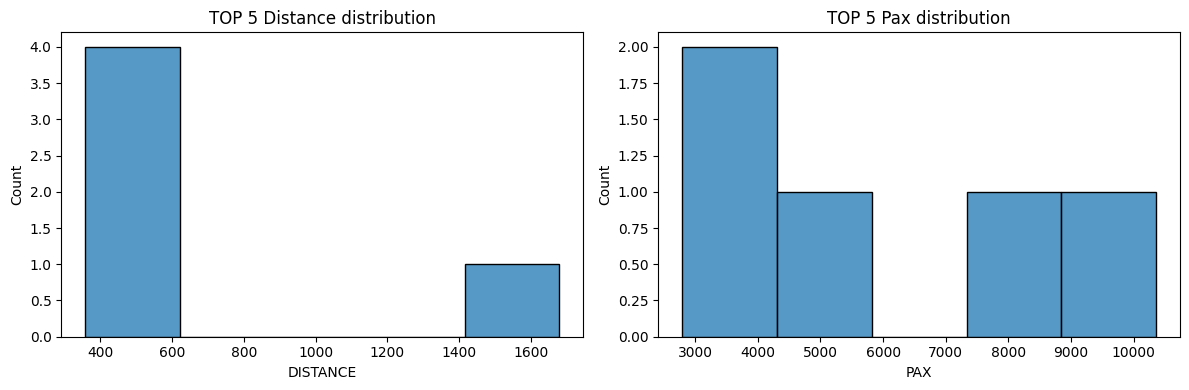

In [19]:
# 오차가 큰 TOP 5 노선 인덱스
top_error_indices = results_df.sort_values(by='절댓값 오차', ascending=False).head(5).index

# 해당 노선들의 특성
top_errors_features = X_valid.loc[top_error_indices]

print("📌 오차 큰 TOP 5 노선 통계 (DISTANCE & PAX)")
print(top_errors_features[['DISTANCE', 'PAX']].describe())

# 분포 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(top_errors_features['DISTANCE'], bins=5, kde=False)
plt.title('TOP 5 Distance distribution')

plt.subplot(1, 2, 2)
sns.histplot(top_errors_features['PAX'], bins=5, kde=False)
plt.title('TOP 5 Pax distribution')

plt.tight_layout()
plt.show()


In [20]:
# 두 그룹의 평균 비교 (수치 요약)
mean_distance_all = X_valid['DISTANCE'].mean()
mean_pax_all = X_valid['PAX'].mean()

mean_distance_top5 = top_errors_features['DISTANCE'].mean()
mean_pax_top5 = top_errors_features['PAX'].mean()

print(f"전체 평균 거리(DISTANCE): {mean_distance_all:.2f}")
print(f"TOP 5 평균 거리(DISTANCE): {mean_distance_top5:.2f}")
print(f"전체 평균 승객 수(PAX): {mean_pax_all:.2f}")
print(f"TOP 5 평균 승객 수(PAX): {mean_pax_top5:.2f}")


전체 평균 거리(DISTANCE): 888.39
TOP 5 평균 거리(DISTANCE): 730.80
전체 평균 승객 수(PAX): 13715.60
TOP 5 평균 승객 수(PAX): 6308.20


**오차가 큰 top 5 노선의 특징**
1. 평균 거리가 짧음 (1680값 외에 모두 평균보다 낮음)
2. 평균 승객 수 극단적으로 적거나, 큼(최솟값, 최댓값 존재)

=> 이 모델은 전반적으로 괜찮은 성능(R² = 0.8380)을 보이지만,
짧은 거리 & 승객 수가 적거나 극단적으로 큰 노선에서는 예측 정확도가 떨어지는 경향이 있음.

**분석 결과**
1. 노선(distance)이 짧을 수록 모델의 예측 성능 불안정
*   앞서 최적의 예측 변수인 거리가 길수록 운임료도 선형적으로 증가한다 가정을 했으나, 오차가 비교적 많이 발생한 짧은 노선에서는 운임료가 단순히 거리로 측정되는 것이 아닌, 다른 변수(요인)가 더 강하게 작용할 가능성 높음.  
 => 짧은 거리에서 단순히 거리 기반 예측은 불안정하다.


---


2. 승객 수(pax)가 적거나, 극단적으로 큰 값에서 예측 성능 불안정
*   극단값에는 학습 데이터가 많지 않기에, 일반화 어려운 문제
*   선형 회귀는 이상치에 영향을 많기 받음.











**2. model.summary을 통한 모델 평가**

:  각 변수의 회귀 계수(coefficient),
표준 오차(std err), t-값(t), P-값(P>|t|), 결정계수(R-squared) 등 다양한 통계 정보 확인. 각 계수가 통계적으로 유의미한지(P-값이
작은지, 보통 0.05 기준) 확인.

=> 현재 LinearRegression(scikit-learn)로 만든 모델은 model.summary()작업이 불가능하여 statsmodels의 OLS(최소제곱법) 모델로 다시 만들어 확인.


In [21]:
!pip install statsmodels


In [22]:
import statsmodels.api as sm

# X와 y 모두 float으로 변환
X_train_const = sm.add_constant(X_train).astype(float)
y_train_float = y_train.astype(float)

# OLS 모델 다시 학습
model = sm.OLS(y_train_float, X_train_const).fit()

# 결과 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   FARE   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     21.04
Date:                Fri, 23 May 2025   Prob (F-statistic):          1.66e-102
Time:                        12:48:48   Log-Likelihood:                -2069.4
No. Observations:                 446   AIC:                             4385.
Df Residuals:                     323   BIC:                             4889.
Df Model:                         122                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

**모델 전체 성능**

| 항목                                                    | 의미          | 해석                                |
| ----------------------------------------------------- | ----------- | --------------------------------- |
| `R-squared: 0.888`                                    | 결정계수        | 이 모델이 전체 운임(FARE)의 **88.8%를 설명**함 |
| `Adj. R-squared: 0.846`                               | 조정된 결정계수    | 변수 수 고려 후에도 **84.6% 설명력 유지** (좋음) |
| `F-statistic: 21.04`, `Prob (F-statistic): 1.66e-102` | 전체 모델 유의성   | 모델이 통계적으로 매우 유의함 (**p ≪ 0.05**)   |
| `No. Observations: 446`, `Df Model: 122`              | 표본 수 및 변수 수 | 샘플: 446개, 독립변수: 122개              |


**통계적으로 유의미한 변수 (p-value < 0.05)**

| 변수                         | 계수 (coef)    | p-value   | 해석                                         |
| -------------------------- | ------------ | --------- | ------------------------------------------ |
| `DISTANCE`                 | **+0.0811**  | **0.000** | 거리 1마일 늘면 운임 평균 **8.1센트 증가**               |
| `PAX`                      | **-0.0011**  | **0.000** | 승객 수가 1명 늘수록 운임은 평균 **0.11센트 감소** (규모의 경제) |
| `SW_Yes`                   | **-24.4031** | **0.000** | SW 항공사가 있으면 평균 운임이 **약 24.40달러 낮아짐**       |
| `VACATION_Yes`             | **-40.8220** | **0.003** | 휴가용 노선일수록 평균 운임이 **약 40.82달러 낮음**          |
| `S_CITY_Dallas/Fort Worth` | +59.12       | 0.000     | 출발지가 DFW면 운임이 **상대적으로 높음**                 |
| `E_CITY_Los Angeles`       | **-75.78**   | **0.000** | 도착지가 LAX면 운임이 **상대적으로 낮음**                 |

=> 	SW가 운행하면 평균 운임 ↓ / 휴가 노선은 낮은 운임 / 승객 수 많으면 운임 낮아짐


**유의하지 않은 변수들 (p > 0.05)**

S_CODE_DCA, S_CITY_Chicago, E_CITY_Boston, GATE_Free, 등 다수

→ 이 변수들은 운임 예측에 기여하지 않음

→ **단계적 회귀(stepwise)**를 통해 제거해야 함

**조건수(Condition Number)**

: 조건수는 선형 회귀 모델에서 독립 변수들 사이에 다중공선성이 있는지를 수치로 나타내는 지표

| 조건수 값               | 해석                          |
| ------------------- | --------------------------- |
| **< 30**            | 안정적 (문제 없음) ✅               |
| **30 \~ 100**       | 다소 문제 있음 (주의) ⚠️            |
| **> 100**           | **강한 다중공선성** (심각함) ❗        |
| **≫ 1e+5 (10⁵ 이상)** | 설계행렬이 거의 특이함 (계산 불가능 수준) 🚨 |



---

**현재 모델의 조건수**
: Cond. No. = 5.76e+18

=> 매우 크고 비정상적인 값

* 해결방안
1. 중복, 불필요한 변수 제거
2. Variance Inflation Factor (VIF) 확인 (변수별 다중공선성 확인)
3. 희소한 가변수(거의 전부 0인 변수) 제거
4. 정규화 회귀 사용 : Ridge, Lasso 회귀는 다중공선성에 더 강함


**2. VIF (분산 팽창 계수) 확인**

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm

# 1. X 데이터에 상수항 추가
X_const = sm.add_constant(X_train).astype(float)  # ← 여기에 X_train은 학습용 독립변수 DataFrame

# 2. VIF 계산
vif_data = pd.DataFrame()
vif_data["변수명"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# 3. 결과 출력
pd.set_option('display.max_rows', None)  # 생략 없이 전체 출력
print(vif_data)



/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                               변수명           VIF
0                            const  0.000000e+00
1                           COUPON  6.342761e+00
2                              NEW  1.466033e+00
3                               HI  2.656228e+00
4                         S_INCOME           inf
5                         E_INCOME           inf
6                            S_POP           inf
7                            E_POP           inf
8                         DISTANCE  5.989358e+00
9                              PAX  3.720207e+00
10                      S_CODE_DCA           inf
11                      S_CODE_EWR           inf
12                      S_CODE_IAD           inf
13                      S_CODE_JFK           inf
14                      S_CODE_LGA           inf
15                      S_CODE_MDW           inf
16                      S_CODE_ORD           inf
17   S_CITY_Anchorage           AK           inf
18   S_CITY_Atlanta             GA           inf
19   S_CITY_Austin  

| VIF 값       | 의미           | 해석            |
| ----------- | ------------ | ------------- |
| 1.0 \~ 5.0  | 보통 수준        | 문제 없음 ✅       |
| 5.0 \~ 10.0 | 다중공선성 가능성 있음 | 주의 ⚠️         |
| 10 이상       | 강한 다중공선성 존재  | 제거 또는 결합 필요 ❗ |


**분석 결과**
 1. VIF = inf (무한대) or NaN인 변수 다수

: S_INCOME, E_POP, S_CODE_DCA, E_CODE_JFK, S_CITY_Chicago, E_CITY_Boston 등

| 원인                               | 설명                                                          |
| -------------------------------- | ----------------------------------------------------------- |
| ✅ **너무 많은 가변수(dummy variables)** | `S_CITY_`, `E_CITY_`, `S_CODE_`, `E_CODE_` 등 수십 개가 들어가 있음   |
| ⚠️ **가변수끼리 서로 완전히 중복**           | 예: `S_CODE_JFK`와 `S_CITY_New York/Newark NY`는 거의 항상 함께 True |
| ⚠️ **샘플 수 대비 변수 수가 너무 많음**       | 샘플은 446개인데, 변수는 140개 이상 → 수학적으로 해가 불안정                      |
| ⚠️ **일부 가변수가 특정 행에서만 1이고 나머지 0** | 희소한 dummy 변수 → OLS 계산에서 문제가 생김                              |

**해결 방안**

=> 단계적 회귀 (Stepwise Selection)	자동으로 중요 변수만 남기고 나머지 제거 (p < 0.05 기준)



---



**ii. 예측 변수의 수를 줄이기 위해서 단계적 회귀 분석을 사용하시오. 처음 4개의 예측 변수(S_CODE, S_CITY, E_CODE, E_CITY)는 제외해도 무방하다. 선택된 모델을 제시하시오.**

**단계적 회귀분석(stepwise regression)**

 : 많은 잠재 예측 변수 중에서 통계적으로 의미 있는 변수만 골라 모델을 구성하는 자동화된 변수선택 기법

- 전진 선택법 (Forward Selection)
- 후진 제거법 (Backward Elimination)
- 단계적 선택법 (Stepwise Selection)  : 전진 선택 + 후진 제거를 번갈아가며 수행

In [24]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [25]:
# 불필요한 변수 제거
# df_encoded를 사용하지 않는 이유 - "S_CODE", "S_CITY", "E_CODE", "E_CITY"의 더미변수 또한 모두 제거 해야함.
df = pd.read_csv("Airfares.csv")
df = df.drop(columns=["S_CODE", "S_CITY", "E_CODE", "E_CITY"])


In [26]:
# 범주형 변수 -> 가변수 처리
categorical_vars = ["VACATION", "SW", "SLOT", "GATE"]
df = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

In [27]:
# 모든 bool 컬럼을 1/0 int로 변환
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)


In [28]:
# 독립변수(X)·종속변수(y) 분리  (예측에 사용할 모든 입력 변수인 독립변수에서 FARE 제외)
X = df.drop(columns="FARE")
y = df["FARE"]

In [29]:
# 학습/검증 세트 분할 (70% / 30%)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

**1. 전진 선택법**
- 빈 모델(절편만 포함)에서 시작
- 남아 있는 후보 변수 중에서 가장 유의미한 변수(예: p-value가 가장 작거나, AIC가 가장 감소)를 하나씩 추가
- 더 이상 추가할 변수가 없을 때(모두 p-value > 기준이거나 AIC 감소가 미미할 때) 종료

- 장점: 단순하고 빠름
- 단점: 이미 들어간 변수가 최종 조합에 방해가 될 수 있음(국소 최적화)

**2. 후진 제거법**
- 모든 후보 변수를 포함한 모델에서 시작
- 포함된 변수 중에서 가장 유의하지 않은 변수(p-value가 가장 크거나, AIC가 가장 증가)를 하나씩 제거
- 더 이상 제거할 변수가 없을 때(모두 p-value < 기준이거나, 제거 시 AIC 악화) 종료

- 장점: 최종 모델에는 항상 “유의미한” 변수만 남음
- 단점: 초기 모델에 너무 많은 변수가 있으면 계산량이 많아짐

In [30]:
'''X : pandas.DataFrame, 모든 후보 독립변수들
   y : pandas.Series, 종속변수
  initial_list : 이미 포함할 변수 리스트 (여기선 빈 리스트로 시작)
  threshold_in : forward step에 변수를 추가할 p-value 기준
  threshold_out: backward step에 변수를 제거할 p-value 기준'''

def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05):
    included = list(initial_list) # 지금 모델에 포함된 변수들의 리스트 (절편만 있는 모델로 시작)
    while True:
        changed = False  # changed: 한 사이클(전진+후진)에서 "추가 or 제거"가 발생했는지 표시하는 플래그

        # (1) 전진 선택법 forward: 후보 변수 중 p-value < threshold_in 이면 추가
        excluded = list(set(X.columns) - set(included))   # 아직 모델에 포함되지 않은 변수들
        new_pval = pd.Series(index=excluded, dtype=float)  #  전진 단계에서 각 후보 변수를 한 번씩 추가했을 때의 p-value 저장용 Series.
        for col in excluded:   # 후보 변수 하나(col)를 포함시켜 보고 /
            model = sm.OLS(y, sm.add_constant(X[included + [col]].astype(float))).fit()  # sm.add_constant() : 절편항(constant) 추가
            new_pval[col] = model.pvalues[col]  # 새로 학습한 모델의 p-value 중, 이 변수(col)의 p-value 저장
        best_pval = new_pval.min()   # 후보들 중 가장 작은 p-value
        if best_pval < threshold_in:   # 기준(threshold_in=0.01)보다 작으면
            included.append(new_pval.idxmin())  # p-value가 최소인 변수명을 꺼내고 / included 리스트에 추가
            changed = True
    # 이로써 "유의미하게 추가할 변수"가 있는지 검사하고, 있으면 포함시킨다.


        # (2) 후진 선택법 backward: 포함된 변수 중 p-value > threshold_out 이면 제거
        model = sm.OLS(y, sm.add_constant(X[included].astype(float))).fit()  # 지금까지 포함된 변수들만으로 모델을 다시 학습
        pvals = model.pvalues.iloc[1:]      # 맨 앞 const 항(절편) 제외[0]하고 변수들에 대한 모든 p-value
        worst_pval = pvals.max()        # 포함된 변수들 중, p-value가 가장 큰 값
        if worst_pval > threshold_out:       # 기준(threshold_out=0.05)보다 크면
            included.remove(pvals.idxmax())    # p-value가 최대인 변수명을 꺼내고 / included 리스트에서 제거
            changed = True
   # 이로써 "유의하지 않은 변수"를 걸러낸다

        if not changed:    # 전진에서도 추가가 없고, 후진에서도 제거가 없었다면, 종
            break
    return included        # 최종적으로 남은 '통계적으로 유의미'한 변수 목록 리턴


**p-value 0.01 이하의 변수만 추가했는데, 후진에서 pv 0.05 이상의 변수가 어떻게 삭제되는가?**

절편만 있던 모델과 (변수 추가되기 전)

절편 + 𝑋𝑘 모델 (전진선택으로 인해 변수 추가된 후)은 아예 다른 회귀식이기에 모델의 잔차 구조가 달라짐.

=> 그 변화로 인해:

절편만 모델에서 𝑋𝑘를 추가했을 때는 p-value가 아주 낮았더라도,

그 모델을 다시 그대로 재평가할 때 (바로 후진 단계 진입 시)
→ p-value가 0.05를 넘어설 수 있음.

In [31]:
stepwise_selection(X, y)

['DISTANCE',
 'SW_Yes',
 'VACATION_Yes',
 'HI',
 'SLOT_Free',
 'GATE_Free',
 'E_POP',
 'PAX',
 'S_POP',
 'E_INCOME']

**단계적 회귀분석 결과**
통계적으로 유의미한 10개 핵심 변수

- 'DISTANCE'
- SW_Yes',
- VACATION_Yes'
- 'HI'
- 'SLOT_Free'
- 'GATE_Free'
- 'E_POP'
- 'PAX'
- 'S_POP'
- 'E_INCOME'



**표준화 계수(standardized coefficients)**

변수마다 단위가 다르면 영향력 비교가 어렵기 때문에, 모든 변수와 타깃을 표준화(평균0, 표준편차1)로 맞춘 후 회귀계수를 구하면 각 변수의 상대적 중요도를 직접 비교.

=> 표준화 계수의 절댓값이 클수록 “상대적으로 중요한 변수”로 해석







**주의**

회귀계수로 비교하지 않은 이유 :
회귀계수는 단순히 절댓값이 클수록 “예측에 미치는 영향이 크다”고 판단.
단위(스케일)가 달라서 해석에 주의가 필요하기에 표준화 계수를 통해 비교함.

In [32]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas as pd

# 1. 단계적 회귀로 뽑은 10개 변수 리스트 (selected_vars)
selected_vars = [
    'DISTANCE',
    'SW_Yes',
    'VACATION_Yes',
    'HI',
    'SLOT_Free',
    'GATE_Free',
    'E_POP',
    'PAX',
    'S_POP',
    'E_INCOME'
]

# 2. X, y 표준화
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_sel = X_train[selected_vars]                # 선택 변수만 추출
X_train_std = scaler_X.fit_transform(X_train_sel)   # 표준화
y_train_std = scaler_y.fit_transform(y_train.values.reshape(-1,1)).flatten()

# 3. 절편 추가
X_train_std_const = sm.add_constant(X_train_std)

# 4. 회귀 분석
model_std = sm.OLS(y_train_std, X_train_std_const).fit()

# 5. 표준화 계수 정리
std_coef_df = pd.DataFrame({
    'std_coef': model_std.params[1:]  # [1:]로 절편(const) 제외
}, index=selected_vars).sort_values(by='std_coef', key=abs, ascending=False)

print(std_coef_df)


              std_coef
DISTANCE      0.652678
SW_Yes       -0.250286
VACATION_Yes -0.231813
HI            0.205627
S_POP         0.168581
PAX          -0.155037
E_POP         0.142410
GATE_Free    -0.124639
SLOT_Free    -0.115979
E_INCOME      0.073394


**분석 결과**

| 변수            |  표준화 계수 |          영향          |
| ------------- | :-----: | :------------------: |
| DISTANCE      |  0.6527 | **가장 영향력 큼 (양의 영향)** |
| SW\_Yes       | -0.2503 |       강한 음의 영향       |
| VACATION\_Yes | -0.2318 |       강한 음의 영향       |
| HI            |  0.2056 |      중간 정도 양의 영향     |
| S\_POP        |  0.1686 |      중간 정도 양의 영향     |
| PAX           | -0.1550 |      중간 정도 음의 영향     |
| E\_POP        |  0.1424 |       약간 양의 영향       |
| GATE\_Free    | -0.1246 |       약간 음의 영향       |
| SLOT\_Free    | -0.1160 |       약간 음의 영향       |
| E\_INCOME     |  0.0734 |     영향 작음 (양의 영향)    |



**단계적 회귀분석 모델 설명력 확인 - 수정된 결정계수(Adjusted R²)**

In [33]:
import statsmodels.api as sm

# 1. stepwise_selection() 결과로 선택된 변수
selected_vars = ['DISTANCE', 'SW_Yes', 'VACATION_Yes', 'HI', 'SLOT_Free', 'GATE_Free', 'E_POP', 'PAX', 'S_POP', 'E_INCOME']

# 2. 데이터 준비 (train 기준)
X_train_sel = X_train[selected_vars]
X_train_sel_const = sm.add_constant(X_train_sel)  # 절편 추가

# 3. 회귀 모델 적합
model_stepwise = sm.OLS(y_train, X_train_sel_const).fit()

# 4. 설명력(결정계수 등) 확인
print("R²: ", model_stepwise.rsquared)
print("Adjusted R²: ", model_stepwise.rsquared_adj)
print(model_stepwise.summary())


R²:  0.7779942245111641
Adjusted R²:  0.7728906434654437
                            OLS Regression Results                            
Dep. Variable:                   FARE   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     152.4
Date:                Fri, 23 May 2025   Prob (F-statistic):          2.45e-135
Time:                        12:49:03   Log-Likelihood:                -2222.3
No. Observations:                 446   AIC:                             4467.
Df Residuals:                     435   BIC:                             4512.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

**단계적 회귀 분석 모델 설명력 결과**

변수 10개가 포함된 단계적 회귀 분석 모델의 설명력

**R²:  0.778**
- 모델이 데이터를 얼마나 잘 설명하는가?”
- 쓸데없는 변수 추가해도 R²는 무조건 커짐.

**Adjusted R²: 0.773**
- 변수의 개수(모델 복잡도)를 감안해서, “실질적으로 설명하는 비율”
- 변수 개수가 늘어날수록 벌점(Penalty)이 생김
- 진짜로 유의미한 변수만 추가했을 때만 올라감


=> 과적합(overfitting) 방지에 더 신뢰할 수 있음!

 iii. 단계적 회귀 분석 대신 전역 탐색을 사용해 (ii)를 반복하시오. 이를 통해 얻은 최적 모델의 예측 변수들과 (ii)에서 얻은 최적 모델의 예측 변수들을 비교하시오.


**전역탐색**
: 모든 변수 조합을 하나도 빠짐없이 전부 비교
- 각 조합으로 회귀모델을 만들고, 그 모델의 성능(설명력, 조정 R², AIC/BIC 등)을 측정
- 가장 좋은 성능을 보이는 조합을 “최적 모델”로 선택
- 변수 수가 적으면 매우 정확함

In [35]:
import itertools
import statsmodels.api as sm
import numpy as np

# 후보 변수 리스트 (불필요한 변수는 위에서 미리 제거)
candidates = list(X_train.columns)  # 총 13개 독립 변수

best_adj_r2 = -np.inf  # 지금까지 찾은 최고 성능(조정된 결정계수)를 저장할 변수 / -np.inf“가장 작은 값”이라는 뜻(최댓값 찾을 때 초기값으로 자주 씀).
best_subset = None     # 최고 성능 모델의 변수 조합을 저장할 변수
best_model = None      # 최고 성능 모델 객체 자체를 저장할 변수

# 변수 개수별 부분집합 생성(실전에서는 1~10개 정도까지만 권장)
for k in range(1, len(candidates)+1):
    for combo in itertools.combinations(candidates, k):    # 주어진 리스트에서 k개를 뽑는 모든 조합을 자동으로 만듦.
        X_sub = sm.add_constant(X_train[list(combo)].astype(float))   # combo : 현재 변수 조합에 해당하는 열만 뽑은 DataFrame / 절편 추가
        model = sm.OLS(y_train, X_sub).fit()   # OLS(최소제곱회귀)로 현재 변수 조합을 사용해서 회귀모델 학습
        if model.rsquared_adj > best_adj_r2:   # 방금 학습한 모델의 조정된 결정계수(Adjusted R²) 가
            best_adj_r2 = model.rsquared_adj   # 지금까지 중에 최고면, 값을 “최고 기록”으로 업데이트.
            best_subset = combo
            best_model = model

print("▶ Best Subset Variables:", best_subset)
print("▶ Best Adjusted R²:", best_adj_r2)


▶ Best Subset Variables: ('NEW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE', 'PAX', 'VACATION_Yes', 'SW_Yes', 'SLOT_Free', 'GATE_Free')
▶ Best Adjusted R²: 0.7737804371209807


**분석 결과**

**최적 변수 조합 (Best Subset Variables)**
- ('NEW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE', 'PAX', 'VACATION_Yes', 'SW_Yes', 'SLOT_Free', 'GATE_Free')

=> 'COUPON' 변수를 제외한 나머지 12개 조합

**Adjusted R(조정된 결정계수)**

**: 0.7738**

=> 전역탐색을 이용한 회귀모델이 전체 운임 변동을 77% 이상 설명할 수 있음

**1. Adjusted R²(조정된 결정계수) 비교**
- 단계적 회귀 분석 모델 : 0.773   (변수 10개)
- 전역탐색 : 0.7738   (변수 12개)

**=> 전역탐색을 통한 모델의 설명력이 미세하게 높음.**



---



**iv. RMSE, 평균 오차, 리프트 차트와 같은 측도들을 사용해 모델 (ii)와 (iii)에 대한 예측 정확도를 비교하시오.**

**예측 정확도 지표 계산**

**1. RMSE (Root Mean Squared Error)**
- 실제값과 예측값 차이(오차)의 제곱평균의 제곱근
- **작을수록** 예측이 정확함

**2. MAE (Mean Absolute Error) / 평균 오차**
- 오차(실제-예측)의 절대값 평균
- **작을수록** 좋음

**3. 리프트 차트(Lift Chart)**
- 예측값을 높은 순서대로 정렬해서,“예측값이 높은 구간에서 실제값도 높은가?” 시각화
- 실전에서는 주로 “상위 10%~20%”를 얼마나 잘 찾아내는지 볼 때 활용
- 회귀 리프트차트가 더 **우하향**인 모델이 더 좋은 모델

In [37]:
# 예측 정확도 지표 계산을 위한 단계적 회귀분석 변수 생성
import statsmodels.api as sm

# 1. stepwise_selection 함수로 이미 'selected_vars' 리스트가 정의되어 있다고 가정
# (예시: selected_vars = ['DISTANCE', 'SW_Yes', 'VACATION_Yes', ...])

# 2. 검증용 데이터에서 선택된 변수만 추출
X_valid_stepwise = X_valid[selected_vars]          # 검증 데이터에서 필요한 변수만
X_valid_stepwise_const = sm.add_constant(X_valid_stepwise)  # 절편 추가

# 3. 예측
y_pred_stepwise = model_stepwise.predict(X_valid_stepwise_const)

In [40]:
# 예측 정확도 지표 계산을 위한 전역탐색 변수 생성
# 1. 검증세트에서 전역탐색으로 뽑힌 변수만 추출
X_valid_best = X_valid[list(best_subset)]
X_valid_best_const = sm.add_constant(X_valid_best)

# 2. 예측 (이미 best_model은 최적 모델 객체임)
y_pred_best = best_model.predict(X_valid_best_const)



In [43]:
import numpy as np
import matplotlib.pyplot as plt

# (1) 예측
# 각각 단계적 회귀분석/전역탐색 모델에서 검증용 데이터셋으로 예측값 생성
y_pred_stepwise = model_stepwise.predict(X_valid_stepwise_const)
y_pred_best = best_model.predict(X_valid_best_const)

# (2) 평가지표
def rmse(y_true, y_pred):                           # 실제값과 예측값의 차이를 제곱해서 평균낸 뒤, 다시 루트(제곱근)
    return np.sqrt(np.mean((y_true - y_pred)**2))   # 오차가 클수록 더 불리하게 반영

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))         # 실제-예측 오차의 절댓값의 평균 (직관적으로 평균 오차 크기)

# 함수 실행 : 검증 데이터(y_valid)와 예측값을 비교해 RMSE, MAE 계산
rmse_stepwise = rmse(y_valid, y_pred_stepwise)
rmse_best = rmse(y_valid, y_pred_best)

mae_stepwise = mae(y_valid, y_pred_stepwise)
mae_best = mae(y_valid, y_pred_best)

print("Stepwise - RMSE:", rmse_stepwise, "/ MAE:", mae_stepwise)
print("BestSubset - RMSE:", rmse_best, "/ MAE:", mae_best)


Stepwise - RMSE: 35.48410754454459 / MAE: 27.036426830572207
BestSubset - RMSE: 35.30185126344144 / MAE: 27.0298570123547


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

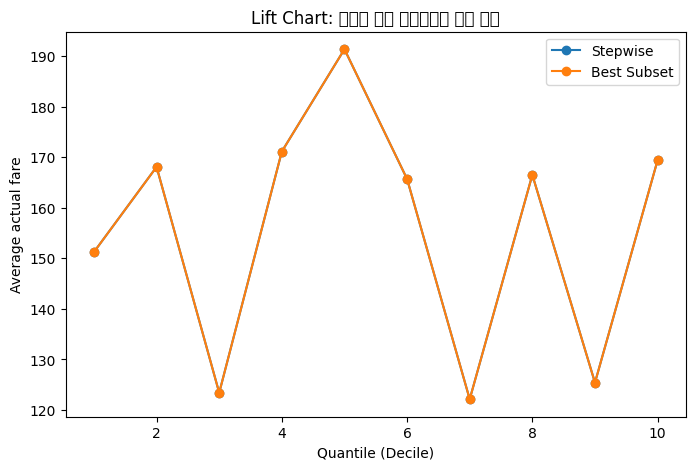

In [44]:
# (3) 리프트 차트
def plot_lift_chart(y_true, y_pred, label):
    df = pd.DataFrame({'true': y_true, 'pred': y_pred}).sort_values('pred', ascending=False)  # 실제값과 예측값으로 데이터프레임 생성 / 예측값 높은 순으로 정렬 (상위 그룹 먼저)
    df['quantile'] = pd.qcut(df.index, 10, labels=False)    # index 기준으로 10등분(분위)로 구간화 (0~9) ex) 1분위 : 예측 운임이 높은 구간
    lift = df.groupby('quantile')['true'].mean()            # 각 분위별로 실제값의 평균을 구함
    plt.plot(range(1, 11), lift, marker='o', label=label)   # 10구간별 실제값 평균을 선으로 그림 (모델별)

plt.figure(figsize=(8, 5))
plot_lift_chart(y_valid, y_pred_stepwise, 'Stepwise')
plot_lift_chart(y_valid, y_pred_best, 'Best Subset')
plt.xlabel('Quantile (분위)')
plt.ylabel('평균 실제 운임')
plt.title('Lift Chart: 예측값 기준 상위구간별 실제 운임')
plt.legend()
plt.show()


**예측 정확도 분석 결과**

**- RMSE, MAE**

|            | RMSE(평균제곱근오차) | MAE(평균절대오차) |
| ---------- | :-----------: | :---------: |
| 단계적 회귀분석   |     35.48     |    27.04    |
| 전역탐색(부분집합) |     35.30     |    27.03    |

- 둘 다 예측 정확도가 유사하므로,
변수 개수, 해석의 편의성을 고려해 더 간단한 모델을 선택해도 무방.

- 단계적 회귀, 전역탐색 모두 RMSE/MAE 차이가 거의 없다. 즉, 전역탐색으로 변수를 더 추가해도 R²가 거의 안 올랐기에, 이미 소수의 주요변수가 설명력이 집중되어 있다는 것을 알 수 있음. ex) DISTANCE, SW_YES


**- Lift Chart**

**- Stepwise, Best Subset 두 모델의 선이 거의 겹침**

=> 두 모델의 예측력이 사실상 거의 같다는 의미

=> 즉, 선택된 변수 조합이 다소 달라도 실제 예측 결과는 비슷하게 나옴


---



**- 선이 요동치는 이유**

: 예측값이 높은 구간에서도 실제값이 낮은 구간이 있고,
예측값이 낮은 구간에서도 실제값이 높은 때가 있음.

=> 모델이“예측값이 높을수록 실제값도 높다”는 패턴을 일관성 있게 잡지 못함.

원인 :
- 모델 자체의 한계
- 주요 변수만으로 설명이 충분하지 않음 등

